# Research Question

What is the relationship between personality factors and the likelihood that the person consumes these 3 drugs : Methamphetamine, Heroin, and Cannabis ? 
We are focusing on these 3 drugs are they are the 3 most abused drugs in Singapore according to Statista 2023.


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt

sb.set()

data = pd.read_csv('DrugConsumptionDS.csv')
data.head()

,ID,Age,Gender,Education,Country,Ethnicity (Real),Nscore (Real),Escore (Real),Oscore (Real),Ascore (Real),...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


# Data cleaning

Removal of inaccurate and erroneous data from the main dataset

In [129]:
#Check for missing values
data.isna().sum().sum()


0

In the description of data, we are told that Semer is a fake drug that is used as a control. 
Since it is a fictatious drug, those that have claimed to have used Semer can be classified as providing inaccurate recounts of their drug usage. 
As a result, their data will be removed from the dataset to improve data reliability


In [130]:
print(data["Semer"].value_counts())
data = data.drop(data[data['Semer'] != 'CL0'].index)
print(" ")
print(data['Semer'].value_counts())

        

CL0    1877
CL2       3
CL3       2
CL1       2
CL4       1
Name: Semer, dtype: int64
 
CL0    1877
Name: Semer, dtype: int64


We would now be classifying CL1 - CL6 Under CL1 for all drugs as they are instances where the drug has been used.

CL0 Never Used                                                                                                                  
CL1 Used over a Decade Ago                                                                                                      
CL2 Used in Last Decade                                                                                                         
CL3 Used in Last Year                                                                                                           
CL4 Used in Last Month                                                                                                          
CL5 Used in Last Week                                                                                                            
CL6 Used in Last Day                                                                                                             

In [131]:
print("Before classification:")
print(data['Meth'].value_counts())
replaceDict = {"CL5": "CL1", "CL6": "CL1", "CL4": "CL1", "CL3": "CL1", "CL2": "CL1"}
data.replace(replaceDict, inplace = True)
print("\nAfter classification:")
print(data['Meth'].value_counts())

Before classification:
CL0    1424
CL3     148
CL2      95
CL6      73
CL4      50
CL5      48
CL1      39
Name: Meth, dtype: int64

After classification:
CL0    1424
CL1     453
Name: Meth, dtype: int64


In the Drug consumption dataset, under data description they displayed the mean and standard deviation of the different personality type values. Thus, we are able to convert the almost perfectly normalized graph into different levels of the various personality types, with level 0 indicating that this individual portrays the least amount of a particular personality trait and level 3 being the other extreme.

In [132]:
# Function to convert normalized values to categorical values
def norm_to_cat(dataframe, mean, std_dev):
    
    class1_min = mean-0.7*std_dev
    class2_min = mean
    class3_min = mean+0.68*std_dev
    
    for x in dataframe:
        if(x<class1_min):
            dataframe.replace({x:"L0"}, inplace=True)
        elif(x>=class1_min and x<class2_min):
            dataframe.replace({x:"L1"}, inplace=True)
        elif(x>=class2_min and x<class3_min):
            dataframe.replace({x:"L2"}, inplace=True)
        elif(x>=class3_min):
            dataframe.replace({x:"L3"}, inplace=True)
    return 0

In [133]:
norm_to_cat(data['Nscore (Real)'], 0.00004, 0.99808)
norm_to_cat(data['Escore (Real)'], -0.00016, 0.99745)
norm_to_cat(data['Oscore (Real)'], -0.00053, 0.99623)
norm_to_cat(data['Ascore (Real)'], -0.00024, 0.99744)
norm_to_cat(data['Cscore (Real)'], -0.00039, 0.99752)
norm_to_cat(data['Impulsive (Real)'], 0.00721, 0.95446)
norm_to_cat(data['SS (Real)'], -0.00329, 0.96370)

print(data['Escore (Real)'].value_counts())

L2    562
L1    449
L3    438
L0    428
Name: Escore (Real), dtype: int64


# Exploratory Data Analysis



Obtaining general insights from the data obtained in the dataset in order to further substantiate the problem we are tackling.

This function produces a bar graph of the frequency of drug usages for each range of personality type L0 to L4, L4 displaying the most extreme ends of that particular personality trait.

In [134]:

def personality_against_drugs(dataframe, df_name):
    # Defining the cross tables
    df_meth = data["Meth"]
    df_cann = data["Cannabis"]
    df_heroin = data["Heroin"]
    ct1 = pd.crosstab(dataframe, df_meth)
    ct2 = pd.crosstab(dataframe, df_cann)
    ct3 = pd.crosstab(dataframe, df_heroin)
    
    #Creating stacked versions of the dataframes against the drug columns
    stacked1 = ct1.stack().reset_index().rename(columns={0:'value'})
    stacked2 = ct2.stack().reset_index().rename(columns={0:'value'})
    stacked3 = ct3.stack().reset_index().rename(columns={0:'value'})
    
    #Creating stacked bar graphs for each personality type against a different kind of drug
    fig, (ax1, ax2, ax3) =plt.subplots(1,3, figsize=(17,7))
    p1 = sb.barplot(x=stacked1[str(df_name)], y=stacked1.value, hue=stacked1.Meth, order=["L0", "L1", "L2", "L3"], ax=ax1)
    p2 = sb.barplot(x=stacked1[str(df_name)], y=stacked2.value, hue=stacked2.Cannabis, order=["L0", "L1", "L2", "L3"], ax=ax2)
    p3 = sb.barplot(x=stacked1[str(df_name)], y=stacked3.value, hue=stacked3.Heroin, order=["L0", "L1", "L2", "L3"], ax=ax3)
    

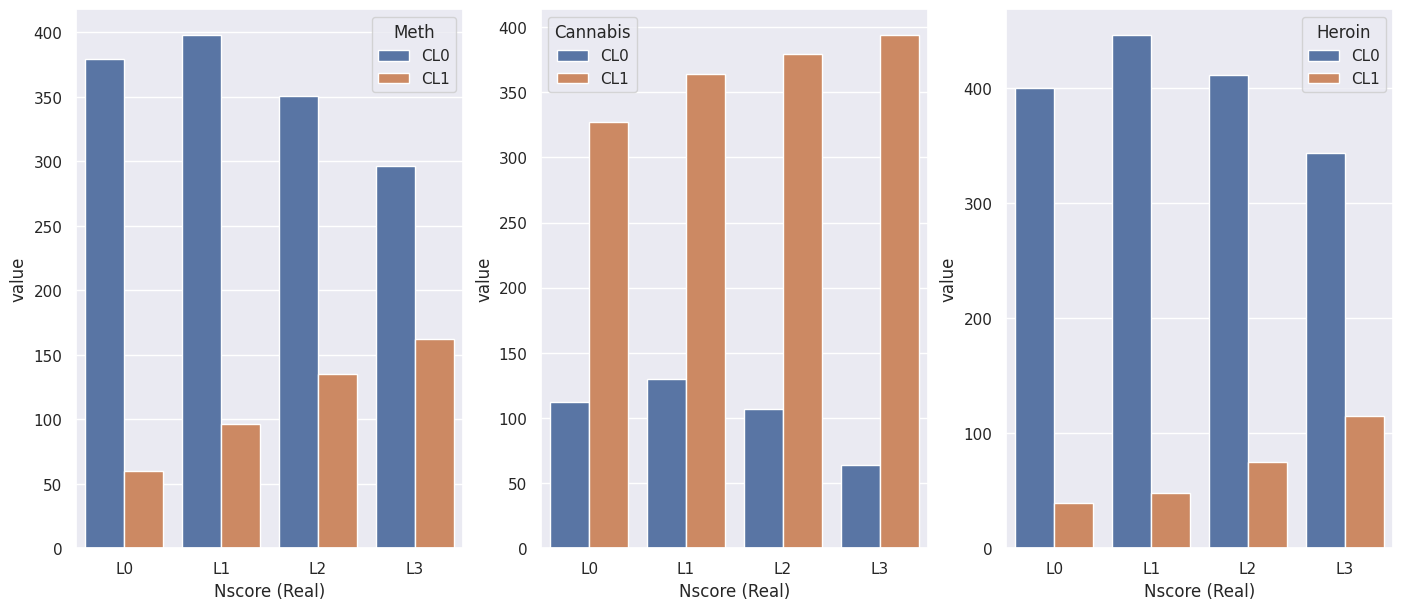

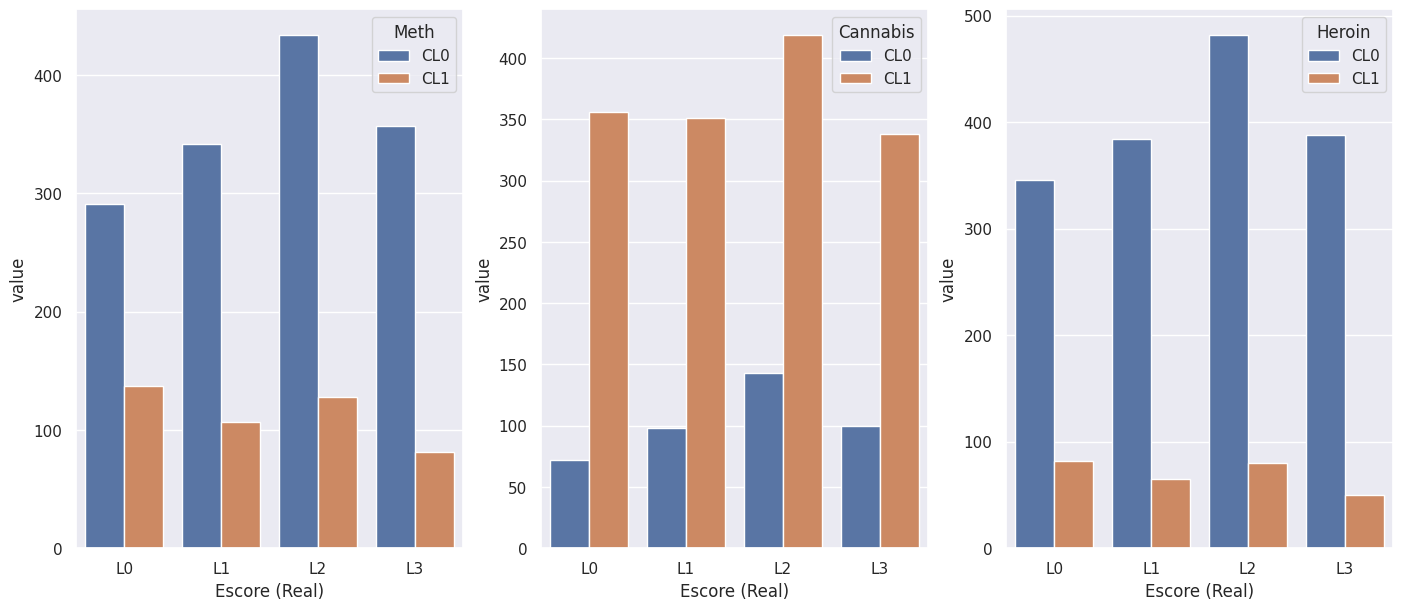

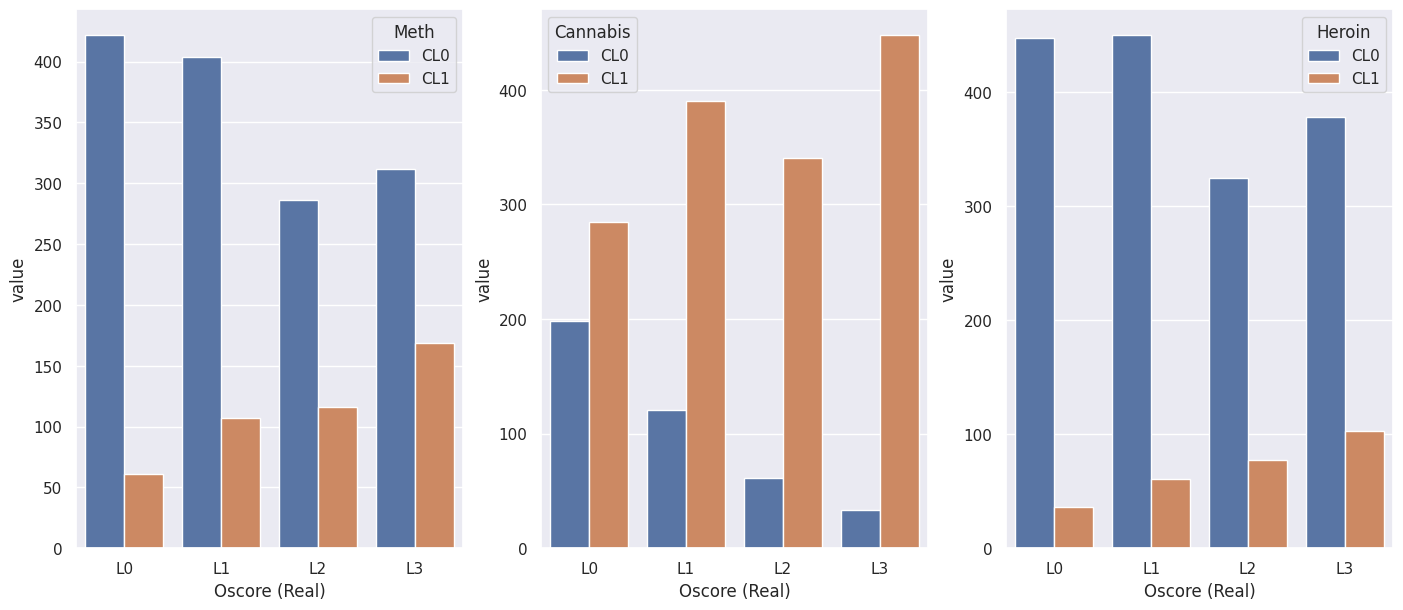

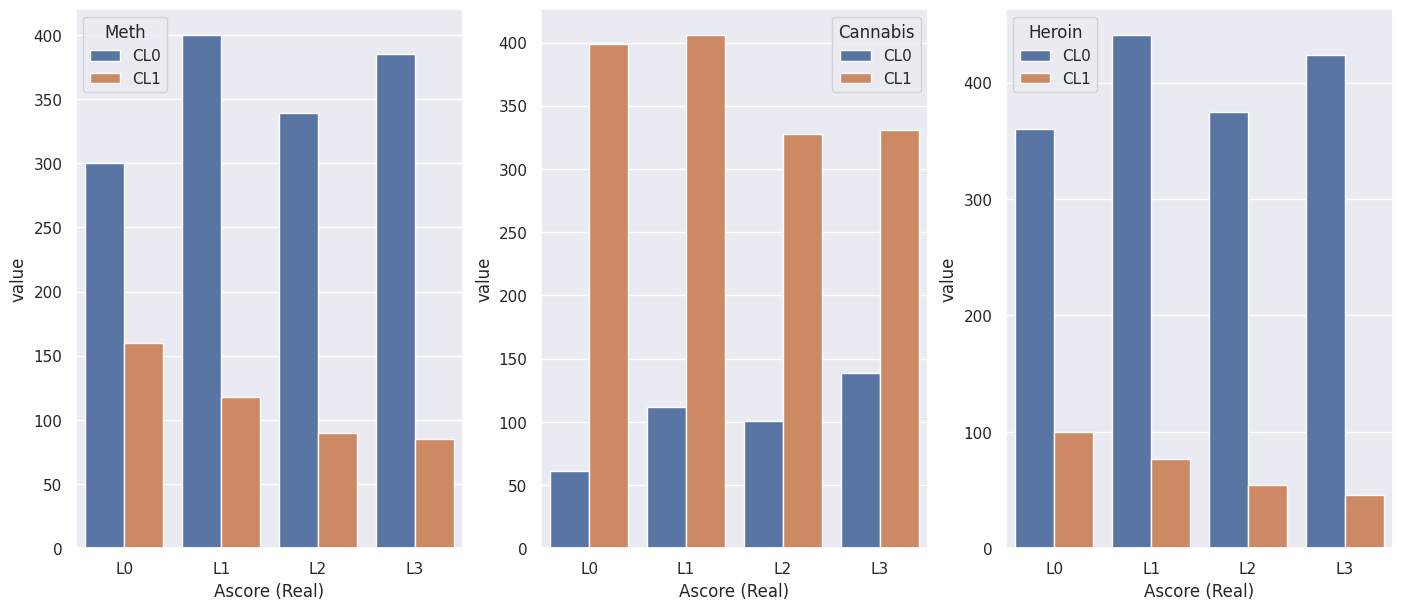

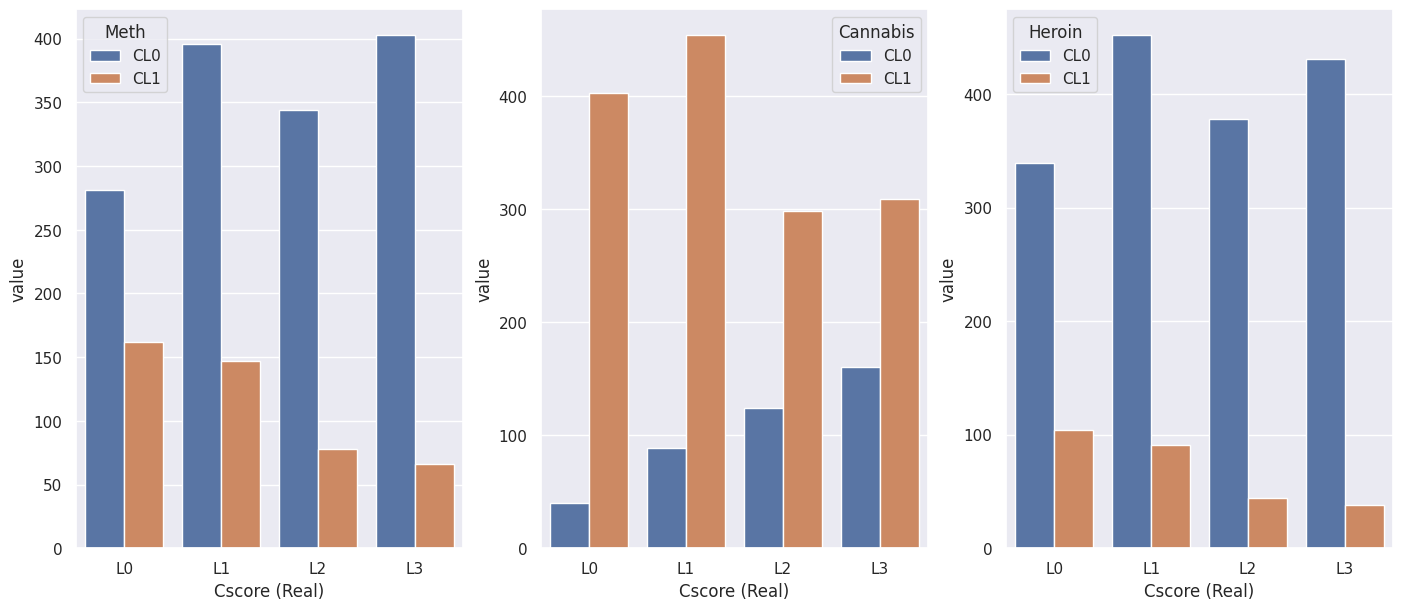

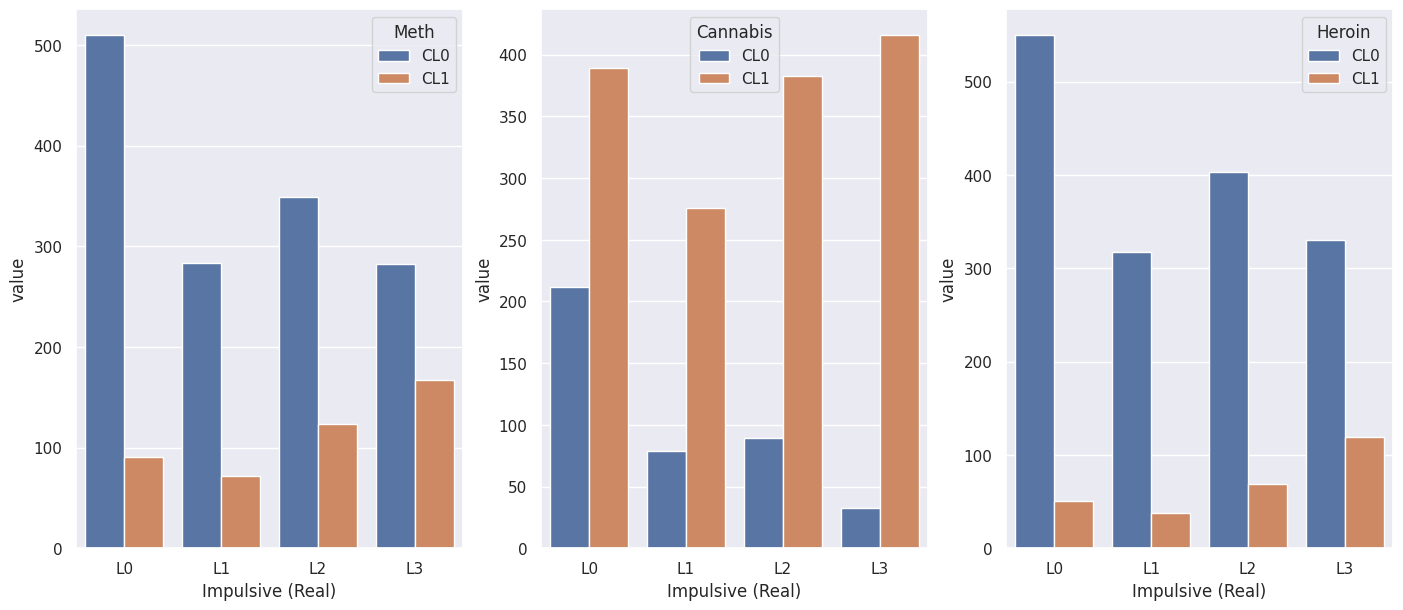

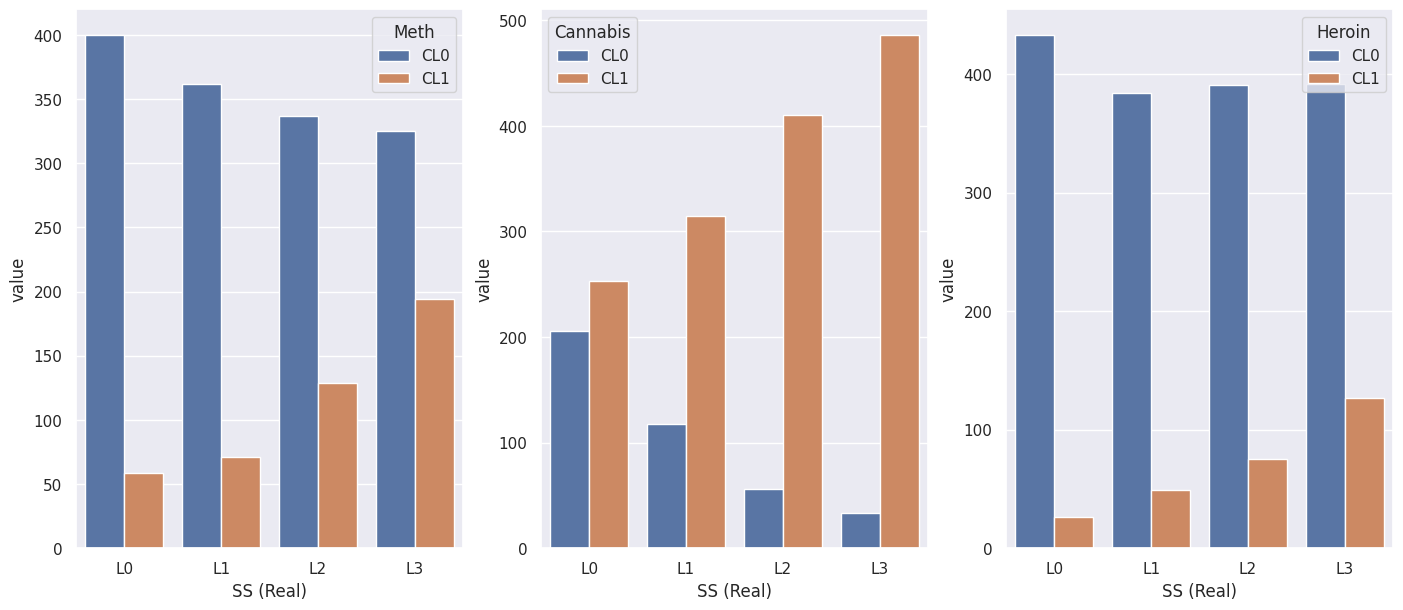

In [135]:
personality_against_drugs(data["Nscore (Real)"], "Nscore (Real)")
personality_against_drugs(data["Escore (Real)"], "Escore (Real)")
personality_against_drugs(data["Oscore (Real)"], "Oscore (Real)")
personality_against_drugs(data["Ascore (Real)"], "Ascore (Real)")
personality_against_drugs(data["Cscore (Real)"], "Cscore (Real)")
personality_against_drugs(data["Impulsive (Real)"], "Impulsive (Real)")
personality_against_drugs(data["SS (Real)"], "SS (Real)")

From the bar graphs, we are able to identify which personality trait affects the consumption of a specific kind of drug the most. For example, it can be seen that for people displaying the more extreme ends of the personality trait impulsiveness, it corresponded to a higher consumption of cannabis compared to the other personality traits.


Changed CL and L values to numeric 

In [136]:
replaceDict = {"CL0": 0, "CL1": 1, "L0": 1, "L1": 2, "L2": 3, "L3":4}
data.replace(replaceDict, inplace = True)

Since all the variables that we are using are categorical, we cannot use a correlation matrix and the corresponding heatmap. Hence, we use another method, named the chi-squared statistic to measure the association between the variables.

# Performing chi-squared statistic between personality types and the chosen drugs:

### Meth:

In [137]:

from scipy.stats import chi2_contingency

# Loop through each input variable and each output variable
for input_var in data.columns[6:12]:
    for output_var in data.columns[27:28]:
        
        # Create a contingency table for the current combination of variables
        contingency_table = pd.crosstab(data[input_var], data[output_var])
        
        # Perform the chi-squared test
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
        
        # Print the results
        print("Chi-squared statistic for input variable %s and output variable %s: %.4f" % (input_var, output_var, chi2_stat))
        print("P-value for input variable %s and output variable %s: %0.2e" % (input_var, output_var, p_val))

Chi-squared statistic for input variable Nscore (Real) and output variable Meth: 67.3386
P-value for input variable Nscore (Real) and output variable Meth: 1.58e-14
Chi-squared statistic for input variable Escore (Real) and output variable Meth: 22.6983
P-value for input variable Escore (Real) and output variable Meth: 4.67e-05
Chi-squared statistic for input variable Oscore (Real) and output variable Meth: 74.4518
P-value for input variable Oscore (Real) and output variable Meth: 4.75e-16
Chi-squared statistic for input variable Ascore (Real) and output variable Meth: 40.7313
P-value for input variable Ascore (Real) and output variable Meth: 7.46e-09
Chi-squared statistic for input variable Cscore (Real) and output variable Meth: 73.2611
P-value for input variable Cscore (Real) and output variable Meth: 8.55e-16
Chi-squared statistic for input variable Impulsive (Real) and output variable Meth: 72.2018
P-value for input variable Impulsive (Real) and output variable Meth: 1.44e-15


We can see that the P-values for all the personality types is quite less. Hence, there is a string association between all personality types and usage of Meth

### Cannabis:

In [138]:
for input_var in data.columns[6:12]:
    for output_var in data.columns[18:19]:
        
        # Create a contingency table for the current combination of variables
        contingency_table = pd.crosstab(data[input_var], data[output_var])
        
        # Perform the chi-squared test
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
        
        # Print the results
        print("Chi-squared statistic for input variable %s and output variable %s: %.4f" % (input_var, output_var, chi2_stat))
        print("P-value for input variable %s and output variable %s: %0.2e" % (input_var, output_var, p_val))

Chi-squared statistic for input variable Nscore (Real) and output variable Cannabis: 25.7094
P-value for input variable Nscore (Real) and output variable Cannabis: 1.10e-05
Chi-squared statistic for input variable Escore (Real) and output variable Cannabis: 10.7557
P-value for input variable Escore (Real) and output variable Cannabis: 1.31e-02
Chi-squared statistic for input variable Oscore (Real) and output variable Cannabis: 177.5247
P-value for input variable Oscore (Real) and output variable Cannabis: 3.02e-38
Chi-squared statistic for input variable Ascore (Real) and output variable Cannabis: 36.8214
P-value for input variable Ascore (Real) and output variable Cannabis: 5.02e-08
Chi-squared statistic for input variable Cscore (Real) and output variable Cannabis: 106.9018
P-value for input variable Cscore (Real) and output variable Cannabis: 5.09e-23
Chi-squared statistic for input variable Impulsive (Real) and output variable Cannabis: 120.5951
P-value for input variable Impulsive

We can see that the P-values for all the personality types is quite less. Hence, there is a string association between all personality types and usage of Cannabis

### Heroin:


In [139]:
for input_var in data.columns[6:12]:
    for output_var in data.columns[23:24]:
        
        # Create a contingency table for the current combination of variables
        contingency_table = pd.crosstab(data[input_var], data[output_var])
        
        # Perform the chi-squared test
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
        
        # Print the results
        print("Chi-squared statistic for input variable %s and output variable %s: %.4f" % (input_var, output_var, chi2_stat))
        print("P-value for input variable %s and output variable %s: %0.2e" % (input_var, output_var, p_val))

Chi-squared statistic for input variable Nscore (Real) and output variable Heroin: 61.2076
P-value for input variable Nscore (Real) and output variable Heroin: 3.24e-13
Chi-squared statistic for input variable Escore (Real) and output variable Heroin: 10.6299
P-value for input variable Escore (Real) and output variable Heroin: 1.39e-02
Chi-squared statistic for input variable Oscore (Real) and output variable Heroin: 46.8324
P-value for input variable Oscore (Real) and output variable Heroin: 3.77e-10
Chi-squared statistic for input variable Ascore (Real) and output variable Heroin: 28.6642
P-value for input variable Ascore (Real) and output variable Heroin: 2.63e-06
Chi-squared statistic for input variable Cscore (Real) and output variable Heroin: 51.3036
P-value for input variable Cscore (Real) and output variable Heroin: 4.22e-11
Chi-squared statistic for input variable Impulsive (Real) and output variable Heroin: 72.6781
P-value for input variable Impulsive (Real) and output variab

We can see that the P-values for all the personality types is quite less. Hence, there is a string association between all personality types and usage of Cannabis

# Random Forest Classifier

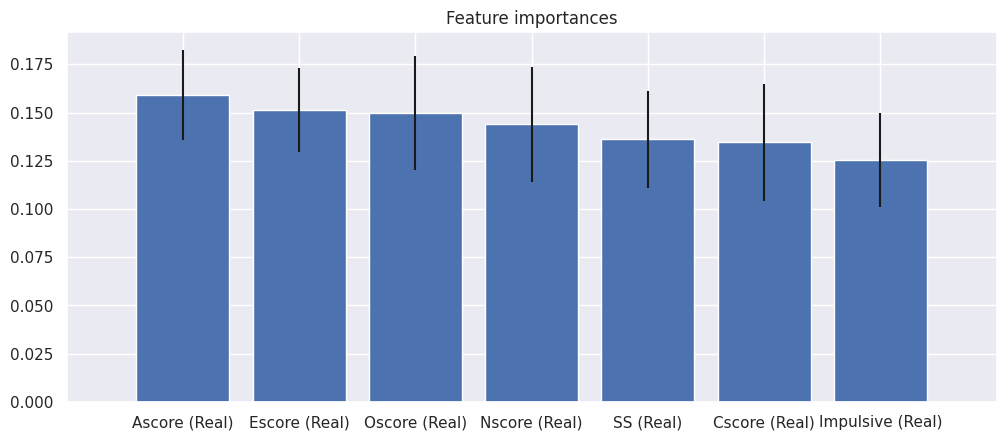

Accuracy: 0.48
              precision    recall  f1-score   support

      Meth_0       0.80      0.91      0.85       289
      Meth_1       0.45      0.24      0.31        87
  Cannabis_0       0.50      0.29      0.37        92
  Cannabis_1       0.80      0.90      0.85       284
    Heroin_0       0.87      0.97      0.92       325
    Heroin_1       0.27      0.08      0.12        51

   micro avg       0.79      0.79      0.79      1128
   macro avg       0.61      0.57      0.57      1128
weighted avg       0.74      0.79      0.76      1128
 samples avg       0.79      0.79      0.79      1128



In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract the predictors and responses
X = data[['Nscore (Real)', 'Escore (Real)', 'Oscore (Real)', 'Ascore (Real)', 'Cscore (Real)', 'Impulsive (Real)', 'SS (Real)']]
y = data[['Meth', 'Cannabis', 'Heroin']]

# Perform one-hot encoding on the response variable
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier and fit the data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plot the feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]


plt.figure().set_figwidth(12)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()

# Test the accuracy of the random forest classifier
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Evaluate the performance of the random forest classifier
print(classification_report(y_test, y_pred, target_names=encoder.get_feature_names_out()))

## In the graph of feature importances, we see that the difference in importance of each personality factor in predicting the class 1-5 of each drug is quite minimal, with only a difference of about 0.020 between each on average. The factor that is deemed to be the most important is Ascore (Real), with the lowest importance being Implusive (Real).

#### Recall 
It is the fraction of true positive predictions out of all the actual positive cases. It is calculated using 'recall = true positives / (true positives + false negatives)'.
#### Precision 
It is the fraction of true positive predictions out of all positive predictions. It is calculated using 'precision = true positives / (true positives + false positives)'.
#### F1-score 
It is the harmonic mean of precision and recall, and is a measure of the overall performance of the model, taking into account both precision and recall. It is calculated using 'F1-score = 2 * (precision * recall) / (precision + recall)'.
#### Support 
It is the number of samples in each class in the testing set, and is useful for understanding the distribution of classes in the testing set.


## From the evaluation matrix we also see from the weighted average that this model has a decently strong precision, f1-score, and recall. However we can also notice that the accuracy is also only moderate, despite the precision, f1-score, recall being moderately strong.

One possible explanation for is that the distribution for data points is highly skewed, that is one class has much more data points that the others leading to class imbalance. 


In [141]:
# We can check the distribution of the code using this code

import numpy as np

train_class_dist = np.sum(y_train, axis=0) / len(y_train)
test_class_dist = np.sum(y_test, axis=0) / len(y_test)

print("Training class distribution:", train_class_dist)
print("Test class distribution:", test_class_dist)


Training class distribution: [0.75616256 0.24383744 0.21385743 0.78614257 0.84943371 0.15056629]
Test class distribution: [0.76861702 0.23138298 0.24468085 0.75531915 0.8643617  0.1356383 ]


From the test, we see that on average the ratio of data between the two classes is 8:2 which is a significant blass imbalance

Now that we have found the issue, one solution that we can employ is a different sampling method. Examples of this are Kfold and ShuffleSplit

# Random Forest with KFold

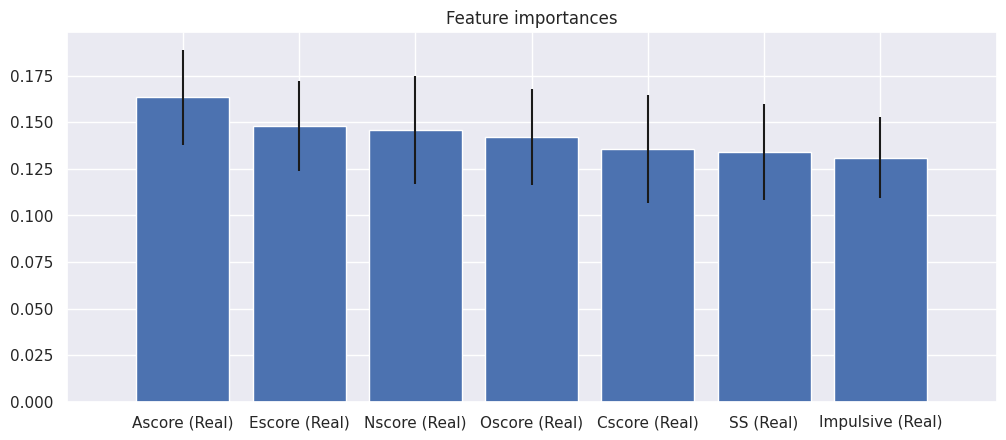

              precision    recall  f1-score   support

      Meth_0       0.80      0.92      0.85       289
      Meth_1       0.47      0.24      0.32        87
  Cannabis_0       0.47      0.28      0.35        92
  Cannabis_1       0.79      0.89      0.84       284
    Heroin_0       0.87      0.96      0.92       325
    Heroin_1       0.33      0.12      0.17        51

   micro avg       0.79      0.78      0.78      1128
   macro avg       0.62      0.57      0.58      1128
weighted avg       0.75      0.78      0.76      1128
 samples avg       0.79      0.78      0.78      1128



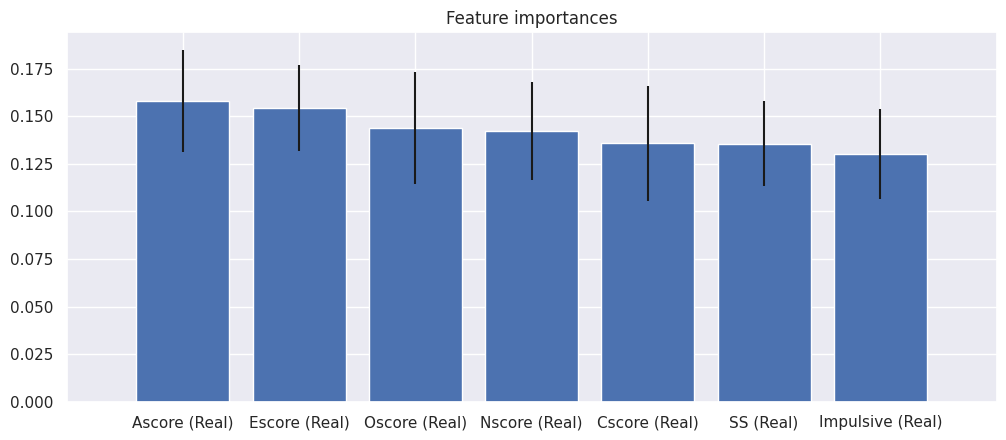

              precision    recall  f1-score   support

      Meth_0       0.72      0.91      0.81       264
      Meth_1       0.47      0.18      0.26       112
  Cannabis_0       0.37      0.27      0.31        70
  Cannabis_1       0.84      0.89      0.87       306
    Heroin_0       0.83      0.95      0.89       309
    Heroin_1       0.29      0.09      0.14        67

   micro avg       0.76      0.76      0.76      1128
   macro avg       0.59      0.55      0.54      1128
weighted avg       0.71      0.76      0.72      1128
 samples avg       0.76      0.76      0.76      1128



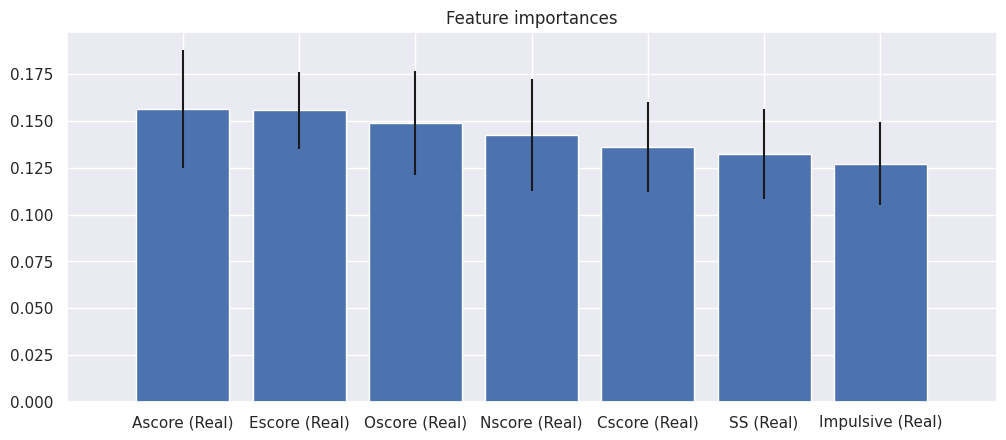

              precision    recall  f1-score   support

      Meth_0       0.80      0.88      0.84       291
      Meth_1       0.38      0.24      0.29        84
  Cannabis_0       0.51      0.29      0.37        90
  Cannabis_1       0.80      0.91      0.85       285
    Heroin_0       0.88      0.95      0.91       325
    Heroin_1       0.33      0.16      0.22        50

   micro avg       0.78      0.78      0.78      1125
   macro avg       0.62      0.57      0.58      1125
weighted avg       0.75      0.78      0.76      1125
 samples avg       0.78      0.78      0.78      1125



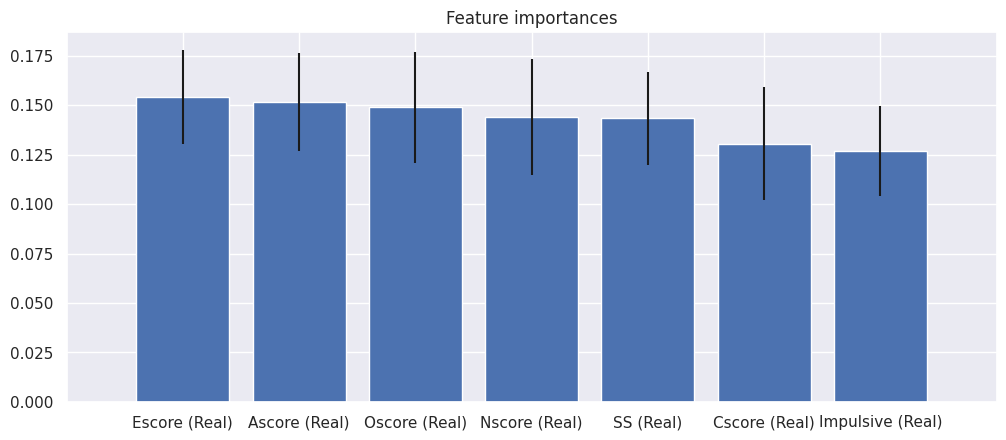

              precision    recall  f1-score   support

      Meth_0       0.83      0.86      0.84       291
      Meth_1       0.44      0.37      0.40        84
  Cannabis_0       0.41      0.35      0.37        75
  Cannabis_1       0.84      0.87      0.86       300
    Heroin_0       0.86      0.93      0.89       318
    Heroin_1       0.29      0.14      0.19        57

   micro avg       0.78      0.78      0.78      1125
   macro avg       0.61      0.59      0.59      1125
weighted avg       0.76      0.78      0.76      1125
 samples avg       0.78      0.78      0.78      1125



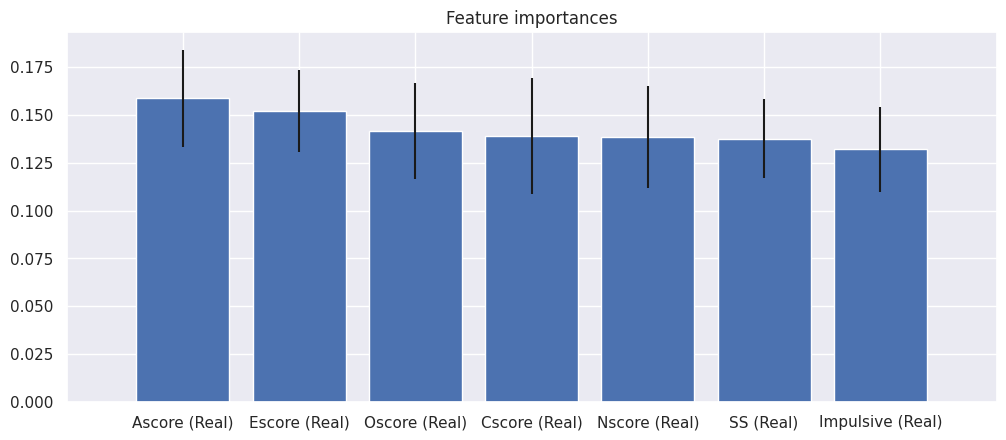

              precision    recall  f1-score   support

      Meth_0       0.79      0.87      0.83       289
      Meth_1       0.36      0.23      0.28        86
  Cannabis_0       0.54      0.41      0.46        86
  Cannabis_1       0.84      0.90      0.86       289
    Heroin_0       0.86      0.94      0.90       323
    Heroin_1       0.18      0.08      0.11        52

   micro avg       0.78      0.78      0.78      1125
   macro avg       0.59      0.57      0.58      1125
weighted avg       0.74      0.78      0.76      1125
 samples avg       0.78      0.78      0.78      1125

Average accuracy: 0.47
Average feature importances: [0.1426382  0.15295939 0.14514361 0.15774597 0.13542895 0.1294969
 0.13658698]


In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

#"Nscore (Real)", "Escore (Real)", "Oscore (Real)", "Ascore (Real)", "Cscore (Real)", "Impulsive (Real)", "SS (Real)", "Meth", "Cannabis","Heroin"


# Extract the predictors and responses
X = data[['Nscore (Real)', 'Escore (Real)', 'Oscore (Real)', 'Ascore (Real)', 'Cscore (Real)', 'Impulsive (Real)', 'SS (Real)']]
y = data[['Meth', 'Cannabis', 'Heroin']]

# Perform one-hot encoding on the response variable
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()

# Initialize the KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create empty lists to store accuracy and feature importances for each fold
accuracy_list = []
importances_list = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create a random forest classifier and fit the data
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Test the accuracy of the random forest classifier
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Plot the feature importances
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    importances_list.append(importances)
    
    #plt.figure()
    plt.figure().set_figwidth(12)
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices])
    plt.xlim([-1, X.shape[1]])
    plt.show()
    
    # Evaluate the performance of the random forest classifier
    print(classification_report(y_test, y_pred, target_names=encoder.get_feature_names_out()))

# Print the average accuracy and feature importances over all folds
print(f"Average accuracy: {np.mean(accuracy_list):.2f}")
print(f"Average feature importances: {np.mean(importances_list, axis=0)}")



# Random Forest with Shuffle Split

              precision    recall  f1-score   support

      Meth_0       0.80      0.91      0.85       289
      Meth_1       0.45      0.24      0.31        87
  Cannabis_0       0.50      0.29      0.37        92
  Cannabis_1       0.80      0.90      0.85       284
    Heroin_0       0.87      0.97      0.92       325
    Heroin_1       0.27      0.08      0.12        51

   micro avg       0.79      0.79      0.79      1128
   macro avg       0.61      0.57      0.57      1128
weighted avg       0.74      0.79      0.76      1128
 samples avg       0.79      0.79      0.79      1128



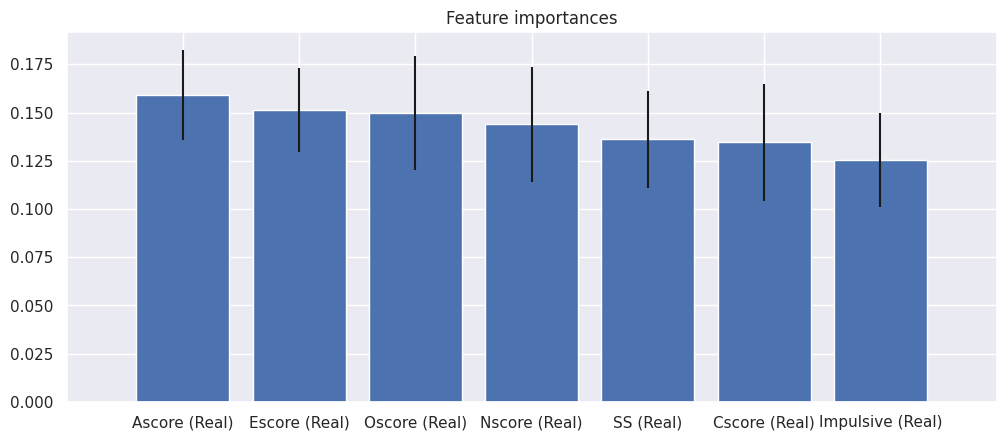

              precision    recall  f1-score   support

      Meth_0       0.78      0.86      0.82       284
      Meth_1       0.37      0.25      0.30        92
  Cannabis_0       0.40      0.26      0.31        77
  Cannabis_1       0.82      0.90      0.86       299
    Heroin_0       0.86      0.95      0.90       318
    Heroin_1       0.32      0.12      0.17        58

   micro avg       0.77      0.77      0.77      1128
   macro avg       0.59      0.56      0.56      1128
weighted avg       0.73      0.77      0.74      1128
 samples avg       0.77      0.77      0.77      1128



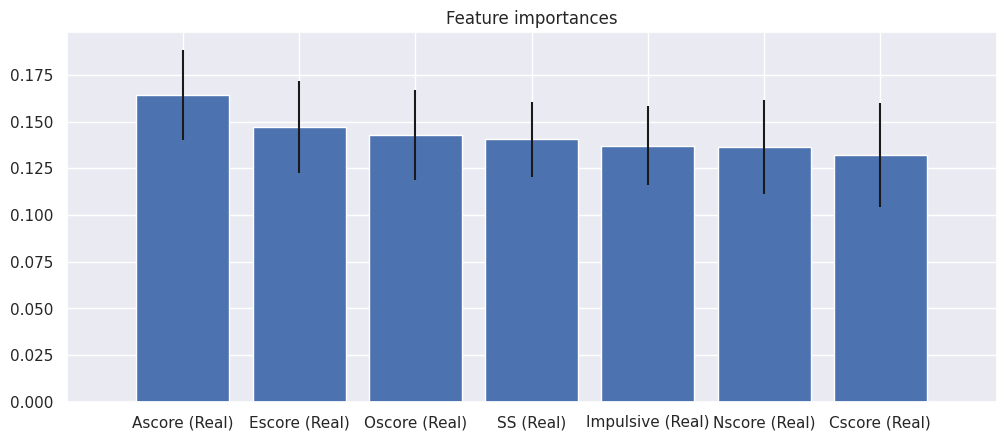

              precision    recall  f1-score   support

      Meth_0       0.80      0.90      0.85       294
      Meth_1       0.38      0.21      0.27        82
  Cannabis_0       0.45      0.32      0.37        92
  Cannabis_1       0.80      0.88      0.84       284
    Heroin_0       0.86      0.94      0.90       321
    Heroin_1       0.25      0.11      0.15        55

   micro avg       0.77      0.77      0.77      1128
   macro avg       0.59      0.56      0.56      1128
weighted avg       0.73      0.77      0.74      1128
 samples avg       0.77      0.77      0.77      1128



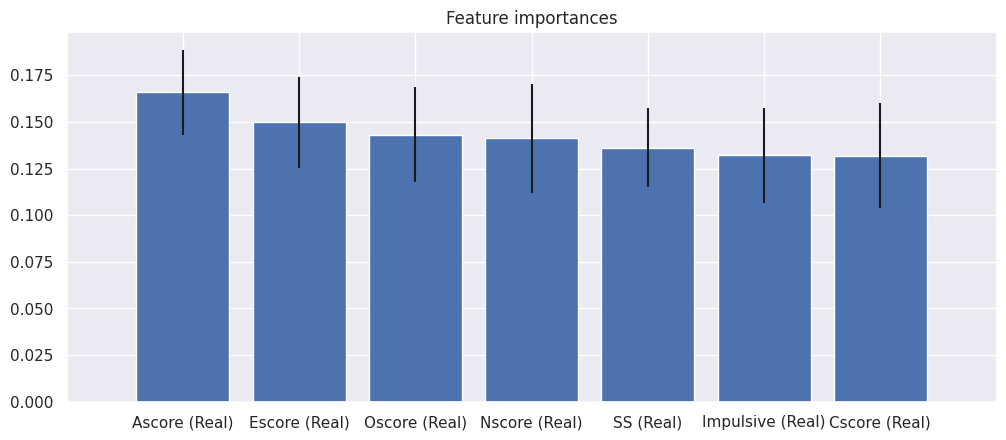

              precision    recall  f1-score   support

      Meth_0       0.78      0.93      0.85       281
      Meth_1       0.53      0.22      0.31        95
  Cannabis_0       0.52      0.32      0.39        92
  Cannabis_1       0.80      0.90      0.85       284
    Heroin_0       0.85      0.96      0.90       319
    Heroin_1       0.18      0.05      0.08        57

   micro avg       0.78      0.78      0.78      1128
   macro avg       0.61      0.56      0.56      1128
weighted avg       0.73      0.78      0.74      1128
 samples avg       0.78      0.78      0.78      1128



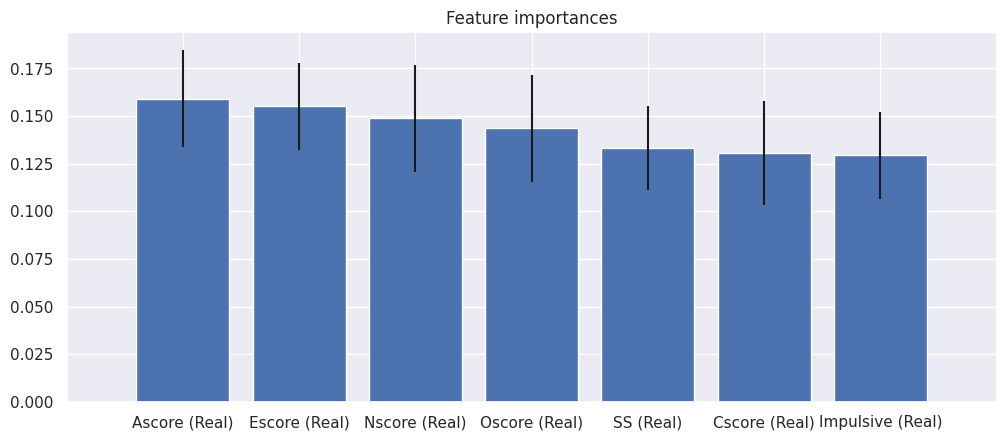

              precision    recall  f1-score   support

      Meth_0       0.79      0.87      0.83       286
      Meth_1       0.42      0.28      0.34        90
  Cannabis_0       0.51      0.28      0.37        81
  Cannabis_1       0.82      0.92      0.87       295
    Heroin_0       0.84      0.94      0.89       314
    Heroin_1       0.24      0.10      0.14        62

   micro avg       0.77      0.77      0.77      1128
   macro avg       0.61      0.56      0.57      1128
weighted avg       0.73      0.77      0.75      1128
 samples avg       0.77      0.77      0.77      1128



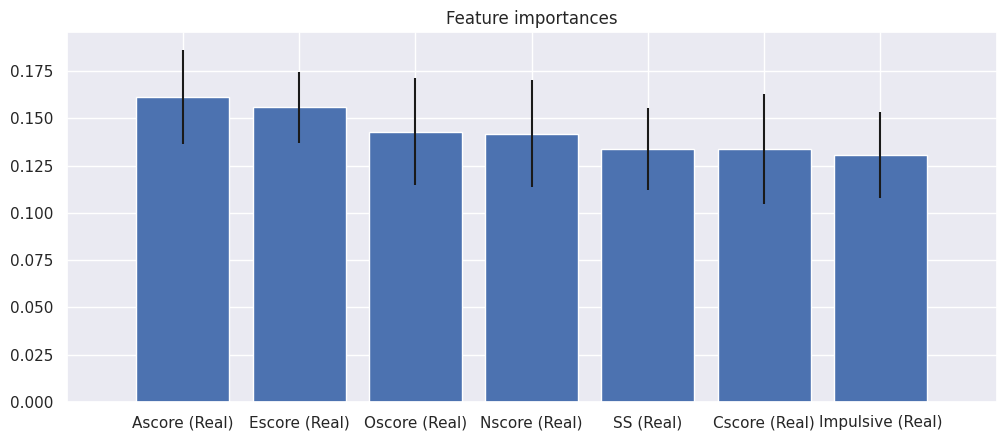

Average accuracy: 0.47
Average feature importances: [0.1425346  0.15237676 0.14478778 0.15985462 0.13397633 0.13021205
 0.13625786]


In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

#"Nscore (Real)", "Escore (Real)", "Oscore (Real)", "Ascore (Real)", "Cscore (Real)", "Impulsive (Real)", "SS (Real)", "Meth", "Cannabis","Heroin"


# Extract the predictors and responses
X = data[['Nscore (Real)', 'Escore (Real)', 'Oscore (Real)', 'Ascore (Real)', 'Cscore (Real)', 'Impulsive (Real)', 'SS (Real)']]
y = data[['Meth', 'Cannabis', 'Heroin']]

# Perform one-hot encoding on the response variable
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()

# Split the data into training and testing sets using ShuffleSplit
splitter = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a random forest classifier and fit the data
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Test the accuracy of the random forest classifier
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

    # Evaluate the performance of the random forest classifier
    print(classification_report(y_test, y_pred, target_names=encoder.get_feature_names_out()))

    # Plot the feature importances
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    importances_list.append(importances)

    plt.figure().set_figwidth(12)
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices])
    plt.xlim([-1, X.shape[1]])
    plt.show()

# Print the average accuracy and feature importances over all splits
print(f"Average accuracy: {np.mean(accuracy_list):.2f}")
print(f"Average feature importances: {np.mean(importances_list, axis=0)}")

### Despite using different sampling methods, our accuracy stays relatively the same. 

### Thus, another solution is to use a different classification algorithm altogether which would be better suited for our problem

# SVC

SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes.

### However, we can only predict one variable at a time, so we run the code once for each drug

### SVC - Meth

Accuracy: 0.7845744680851063
Confusion Matrix:
[[284   5]
 [ 76  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       289
           1       0.69      0.13      0.21        87

    accuracy                           0.78       376
   macro avg       0.74      0.55      0.54       376
weighted avg       0.77      0.78      0.72       376



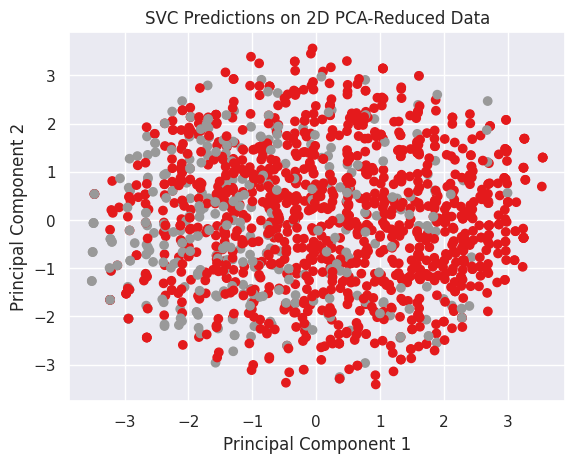

In [145]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Encoding categorical features
label_encoders = {}
for column in ['Nscore (Real)', 'Escore (Real)', 'Oscore (Real)', 'Ascore (Real)', 'Cscore (Real)', 'Impulsive (Real)', 'SS (Real)']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting the dataset into training and testing sets
X = data[['Nscore (Real)', 'Escore (Real)', 'Oscore (Real)', 'Ascore (Real)', 'Cscore (Real)', 'Impulsive (Real)', 'SS (Real)']]  # Replace "target_column" with the name of the column indicating drug usage
y = data['Meth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Training the SVC model
svc = LinearSVC(penalty='l2', dual=False)
svc.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{report}")
# Using PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

#Plotting the predictions on a 2D plane
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Set1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVC Predictions on 2D PCA-Reduced Data')
plt.show()

### SVC - Heroin

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8643617021276596
Confusion Matrix:
[[325   0]
 [ 51   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       325
           1       0.00      0.00      0.00        51

    accuracy                           0.86       376
   macro avg       0.43      0.50      0.46       376
weighted avg       0.75      0.86      0.80       376



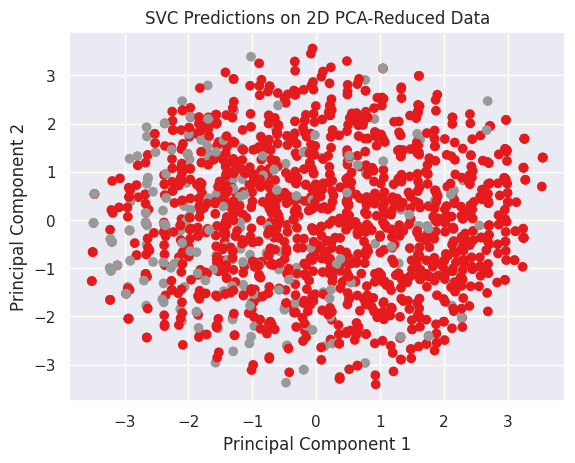

In [147]:
import pandas as pd
from sklearn.svm import LinearSVC

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Encoding categorical features
label_encoders = {}
for column in ['Nscore (Real)', 'Escore (Real)', 'Oscore (Real)', 'Ascore (Real)', 'Cscore (Real)', 'Impulsive (Real)', 'SS (Real)']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

#Splitting the dataset into training and testing sets
X = data[['Nscore (Real)', 'Escore (Real)', 'Oscore (Real)', 'Ascore (Real)', 'Cscore (Real)', 'Impulsive (Real)', 'SS (Real)']]  # Replace "target_column" with the name of the column indicating drug usage
y = data['Heroin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Training the SVC model
svc = LinearSVC(penalty='l2', dual=False)
svc.fit(X_train, y_train)

#Making predictions and evaluating the model
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{report}")
# Using PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plotting the predictions on a 2D plane
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Set1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVC Predictions on 2D PCA-Reduced Data')
plt.show()

### SVC - Cannabis

Accuracy: 0.7712765957446809
Confusion Matrix:
[[ 22  70]
 [ 16 268]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.24      0.34        92
           1       0.79      0.94      0.86       284

    accuracy                           0.77       376
   macro avg       0.69      0.59      0.60       376
weighted avg       0.74      0.77      0.73       376



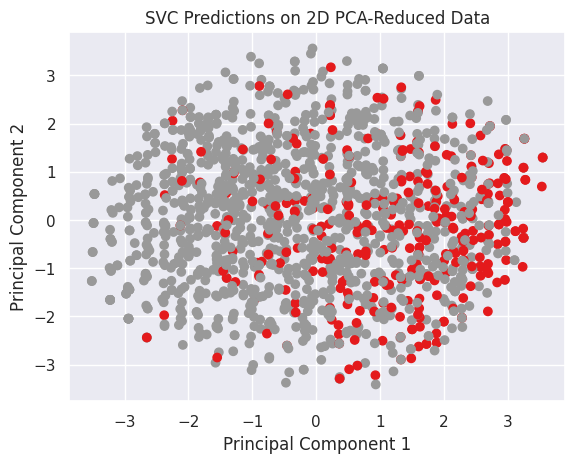

In [146]:
import pandas as pd
from sklearn.svm import LinearSVC

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Encoding categorical features
label_encoders = {}
for column in ['Nscore (Real)', 'Escore (Real)', 'Oscore (Real)', 'Ascore (Real)', 'Cscore (Real)', 'Impulsive (Real)', 'SS (Real)']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting the dataset into training and testing sets
X = data[['Nscore (Real)', 'Escore (Real)', 'Oscore (Real)', 'Ascore (Real)', 'Cscore (Real)', 'Impulsive (Real)', 'SS (Real)']]  # Replace "target_column" with the name of the column indicating drug usage
y = data['Cannabis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training the SVC model
svc = LinearSVC(penalty='l2', dual=False)
svc.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{report}")
# Using PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plotting the predictions on a 2D plane
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Set1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVC Predictions on 2D PCA-Reduced Data')
plt.show()

## We see from the SVC models that the average accuracy is 0.80.

However, initally the model would only predict 0s instead of both 1s and 0s.

Thus we had to implement L2 regularisation, a technique used in machine learning to prevent overfitting of 
models by adding a penalty term to the loss function.

We also had to use PCA, Principal Component Analysis, which is a technique for reducing the dimensionality of 
large datasets while retaining as much data as possible.

However, we still had the problem where the model only predicted 0s, for heroin.

### Thus we tried using a new ML technique which would overcome these problems, while potentially being more accurate at the same time

# Neural Network

It is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way human brain operates

In [149]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
# Define the model architecture
model = Sequential()
model.add(Dense(6, input_dim=7, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
x = data[['Nscore (Real)', 'Escore (Real)', 'Oscore (Real)', 'Ascore (Real)', 'Cscore (Real)', 'Impulsive (Real)', 'SS (Real)']]
y = data[['Cannabis', 'Meth', 'Heroin']]
x_train, x_test, y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)


X_train = x_train.values
Y_train = y_train.values
X_test=x_test.values
Y_test=y_test.values

# Train the model
model.fit(X_train, Y_train, batch_size=300, epochs=10, validation_data=(X_test, Y_test))


Epoch 1/10
6/6 [==============================] - 1s 56ms/step - loss: 0.7305 - accuracy: 0.3804 - val_loss: 0.7215 - val_accuracy: 0.5266
Epoch 2/10
6/6 [==============================] - 0s 15ms/step - loss: 0.7153 - accuracy: 0.5003 - val_loss: 0.7089 - val_accuracy: 0.6090
Epoch 3/10
6/6 [==============================] - 0s 14ms/step - loss: 0.7030 - accuracy: 0.5883 - val_loss: 0.6979 - val_accuracy: 0.6782
Epoch 4/10
6/6 [==============================] - 0s 12ms/step - loss: 0.6920 - accuracy: 0.6622 - val_loss: 0.6879 - val_accuracy: 0.7261
Epoch 5/10
6/6 [==============================] - 0s 11ms/step - loss: 0.6818 - accuracy: 0.7408 - val_loss: 0.6784 - val_accuracy: 0.7926
Epoch 6/10
6/6 [==============================] - 0s 15ms/step - loss: 0.6722 - accuracy: 0.7881 - val_loss: 0.6688 - val_accuracy: 0.8351
Epoch 7/10
6/6 [==============================] - 0s 12ms/step - loss: 0.6627 - accuracy: 0.8354 - val_loss: 0.6591 - val_accuracy: 0.8670
Epoch 8/10
6/6 [===========

In [150]:
_, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
_, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")

Train accuracy: 0.93
Test accuracy: 0.94


### Our neural network uses 2 Hidden layers which contain 6 nodes and 4 nodes each.

### Through our implementation we were able to create a model with an accuracy of 0.94, which is the best of all the ML models that we have tried.

## With this model we are able to most accurately predict drug usage based on personality factors